### Logistic Regression Model


*IBM.csv* dataset, which contains information about employees, including a categorical variable to indicate whether they left the company (Attrition).

### - Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### - Reading Data

In [2]:
df = pd.read_csv(r'IBM.csv')
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [3]:
df.shape

(1470, 13)

### - Data Types

In [4]:
# Get the data types of each column
data_types = df.dtypes
data_types

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [5]:
# Find unique data types in the DataFrame
unique_data_types = data_types.unique()
unique_data_types

array([dtype('int64'), dtype('O')], dtype=object)

In [6]:
# Define the list of categorical variables
categorical_variables = ['Attrition', 'Department', 'EducationField', 'MaritalStatus']

# Define the list of numeric variables
numeric_variables = ['Age', 'DistanceFromHome','Education', 'EnvironmentSatisfaction', 
                     'JobSatisfaction', 'MonthlyIncome','NumCompaniesWorked', 'WorkLifeBalance','YearsAtCompany']

# Convert the remaining columns to numeri

# Check the updated data types
print("Categorical Variables:")
print(categorical_variables)
print("\nNumeric Variables:")
print(numeric_variables)

Categorical Variables:
['Attrition', 'Department', 'EducationField', 'MaritalStatus']

Numeric Variables:
['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany']


<strong>RESULT:</strong><br>
So far we have integer and object (categorical) variables.<br>
Based on the what we are looking, we might convert them to another type.

In [7]:
df['Attrition'].dtype

dtype('O')

<strong>RESULT:</strong><br>
The Attrition variable is an object. (text strings.) It includes Yes and No (str) options.

In [8]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

<strong>RESULT:</strong><br>
However, with value_counts() function shows how many unique values in Series.<br>
That's the reason we see the data type is integer.<br>

- We have 1233 records No and 237 records Yes (left the job).<br>

There is imbalance in class distribution. So, it could be important for certain types of analysis, such as predictive modeling, where class imbalance might need to be addressed.


### - Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [10]:
df['Attrition'].dtype

dtype('int64')

In [11]:
categorical_variables

['Attrition', 'Department', 'EducationField', 'MaritalStatus']

In [12]:
# Remove 'Attrition' from categorical variables
categorical_variables.remove('Attrition')

# Add 'Attrition' to numeric variables
numeric_variables.append('Attrition')

# Check the updated data types
print("Categorical Variables:")
print(categorical_variables)
print("\nNumeric Variables:")
print(numeric_variables)

Categorical Variables:
['Department', 'EducationField', 'MaritalStatus']

Numeric Variables:
['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany', 'Attrition']


<strong>RESULT:</strong><br>
Now, we converted the Attrition object to numeric data types.<br>
A label encoder goes through the categories and gives each one a unique number.<br>
We have Yes and No options. So system indicates 1 as a Yes and 0 as a No.

E. Missing values.  Are there any variables in this dataset for which more than half the values are missing?   If so, remove them.  (Note: This is not a trick question – just answer it literally).  
- a. *Why might it be dangerous to impute values for variables with a huge % of missingness?*

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 149.4+ KB


In [14]:
df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [15]:
df.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

<Axes: >

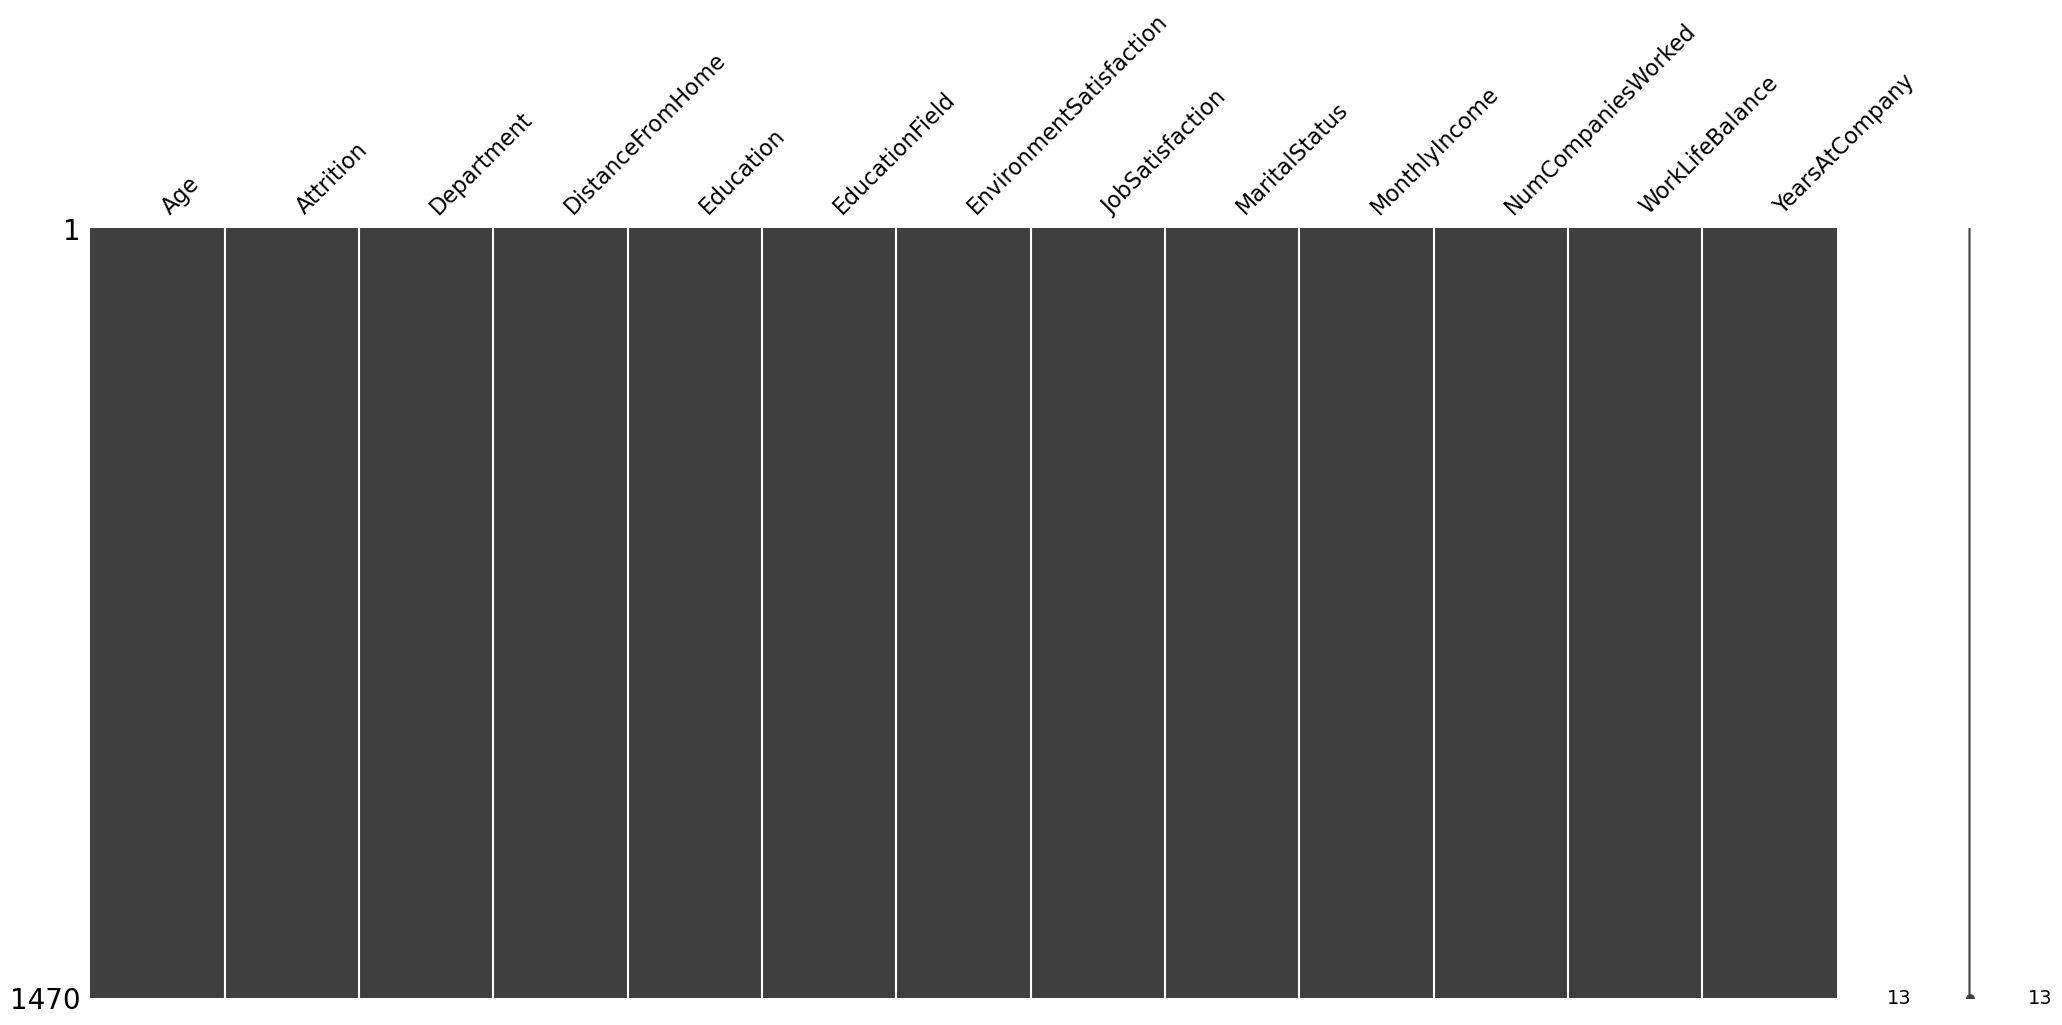

In [16]:
import missingno as msno
msno.matrix(df)

<strong>RESULT:</strong><br>
We can check the missing values with several approaches: info(), isnull(), isna(), and with missingno package.<br>
Those findings show we do not have missing values in our dataset.<br><br>

- Missing values could cause a problem during the data exploration through modeling.<br>
Imputation is a method of correcting errors and estimating and filling in missing values in a data set.<br>
Generally, missing data replace with mean, median or linear regression result.<br>
Choosing by approach the other is not easy process because it might highly cause for wrong reputition on data.<br><br>

For example:<br>
If the data related to income and includes more higher values then average (mean) value would be higher.<br>
If we impute missing values with higher mean value, then we cannot have correct perspective of data.<br>
(also vice verse. - even the situation will cause outliers.)<br><br>

<strong>- What we should do?</strong><br>
We should take a look closely the data and decide what option (mean, median, linear regresiion result, or simply dropping) will be better based on the what we are looking for. (descriptive, predictive,prescriptive.)







## - Correlation
Building a correlation table to examine the correlations among the numeric independent variables.  

In [17]:
numeric_variables

['Age',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'WorkLifeBalance',
 'YearsAtCompany',
 'Attrition']

<strong>NOTE:</strong>
I sorted variables by MonthlyIncome to display better correlation map.

In [18]:
df_num_sorted = df.reindex(columns = ['MonthlyIncome','Attrition','Age','DistanceFromHome','Education','EnvironmentSatisfaction',
 'JobSatisfaction', 'NumCompaniesWorked', 'WorkLifeBalance','YearsAtCompany'])

df_num_sorted.head()

,MonthlyIncome,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,5993,1,41,1,2,2,4,8,1,6
1,5130,0,49,8,1,3,2,1,3,10
2,2090,1,37,2,2,4,3,6,3,0
3,2909,0,33,3,4,4,3,1,3,8
4,3468,0,27,2,1,1,2,9,3,2


In [19]:
cor_num_sorted = df_num_sorted.corr()
cor_num_sorted.style.background_gradient(cmap='coolwarm')

,MonthlyIncome,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
MonthlyIncome,1.000000,-0.159840,0.497855,-0.017014,0.094961,-0.006259,-0.007157,0.149515,0.030683,0.514285
Attrition,-0.159840,1.000000,-0.159205,0.077924,-0.031373,-0.103369,-0.103481,0.043494,-0.063939,-0.134392
Age,0.497855,-0.159205,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.299635,-0.021490,0.311309
DistanceFromHome,-0.017014,0.077924,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.029251,-0.026556,0.009508
Education,0.094961,-0.031373,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.126317,0.009819,0.069114
EnvironmentSatisfaction,-0.006259,-0.103369,0.010146,-0.016075,-0.027128,1.000000,-0.006784,0.012594,0.027627,0.001458
JobSatisfaction,-0.007157,-0.103481,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.055699,-0.019459,-0.003803
NumCompaniesWorked,0.149515,0.043494,0.299635,-0.029251,0.126317,0.012594,-0.055699,1.000000,-0.008366,-0.118421
WorkLifeBalance,0.030683,-0.063939,-0.021490,-0.026556,0.009819,0.027627,-0.019459,-0.008366,1.000000,0.012089
YearsAtCompany,0.514285,-0.134392,0.311309,0.009508,0.069114,0.001458,-0.003803,-0.118421,0.012089,1.000000


<strong>RESULT:</strong><br><br>

<b>Attrition</b> shows a negative correlation with MonthlyIncome at -0.159, which is relatively low.
The other variables show very low to moderate correlations.<br><br>

<b>MonthlyIncome</b> and <b>YearsAtCompany</b> have the highest correlation with <b>Age</b>, at approximately 0.498 and 0.514 respectively.<br>
While these are moderate correlations, they are not typically considered high enough (common treshold 0.7 - 0.8) to indicate problems with multicollinearity.<br>

- However, they still mightly make a cause. So, I chose to drop them.




In [20]:
# Drop the 'MonthlyIncome' and 'Age' columns from the DataFrame
df_num_sorted_reduced = df_num_sorted.drop(columns=['MonthlyIncome', 'Age'])

# Calculate the new correlation matrix
cor_num_sorted_reduced = df_num_sorted_reduced.corr()

cor_num_sorted_reduced.style.background_gradient(cmap='coolwarm')

,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Attrition,1.000000,0.077924,-0.031373,-0.103369,-0.103481,0.043494,-0.063939,-0.134392
DistanceFromHome,0.077924,1.000000,0.021042,-0.016075,-0.003669,-0.029251,-0.026556,0.009508
Education,-0.031373,0.021042,1.000000,-0.027128,-0.011296,0.126317,0.009819,0.069114
EnvironmentSatisfaction,-0.103369,-0.016075,-0.027128,1.000000,-0.006784,0.012594,0.027627,0.001458
JobSatisfaction,-0.103481,-0.003669,-0.011296,-0.006784,1.000000,-0.055699,-0.019459,-0.003803
NumCompaniesWorked,0.043494,-0.029251,0.126317,0.012594,-0.055699,1.000000,-0.008366,-0.118421
WorkLifeBalance,-0.063939,-0.026556,0.009819,0.027627,-0.019459,-0.008366,1.000000,0.012089
YearsAtCompany,-0.134392,0.009508,0.069114,0.001458,-0.003803,-0.118421,0.012089,1.000000


<strong>RESULTL</strong><br>
Now, we do not have multicolle risk between the numeric variables.

## - Dummy Variables
Converting categorical variables to dummy variables.
After dummified variable, we will have only numeric variables in the dataset.

In [21]:
categorical_variables

['Department', 'EducationField', 'MaritalStatus']

In [22]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [23]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [24]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [25]:
categorical_variables

['Department', 'EducationField', 'MaritalStatus']

In [26]:
# Convert categorical variables into dummy variables
df_with_dummies = pd.get_dummies(df, columns=['Department', 'EducationField', 'MaritalStatus'], drop_first=True)

# Display the new DataFrame structure
print(df_with_dummies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   JobSatisfaction                    1470 non-null   int64
 6   MonthlyIncome                      1470 non-null   int64
 7   NumCompaniesWorked                 1470 non-null   int64
 8   WorkLifeBalance                    1470 non-null   int64
 9   YearsAtCompany                     1470 non-null   int64
 10  Department_Research & Development  1470 non-null   bool 
 11  Department_Sales                   1470 non-null   bool 
 12  EducationField_Life 

## - Data Partition.  

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df_with_dummies.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [29]:
X = df_with_dummies[['Age','DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'MaritalStatus_Married',
       'MaritalStatus_Single']]
y = df_with_dummies['Attrition']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 654 )

print(X_train.shape, X_test.shape, type(X_train), type(X_test))
print(y_train.shape, y_test.shape, type(y_train), type(y_test))

(882, 18) (588, 18) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(882,) (588,) <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [32]:
# Calculate the total number of samples
total_samples = X.shape[0]

# Calculate percentages
train_percentage = (X_train.shape[0] / total_samples) * 100
test_percentage = (X_test.shape[0] / total_samples) * 100

print("Training set percentage: {:.2f}%".format(train_percentage))
print("Test set percentage: {:.2f}%".format(test_percentage))

Training set percentage: 60.00%
Test set percentage: 40.00%


<strong>RESULT:</strong><br>
I splitted the data (df_with_dummies) into 60% training and 40% test.<br>

Outcome variable: Attrition<br>
Inputs: All numeric variables.

In [33]:
print(X_train.dtypes)
print(y_train.dtypes)

Age                                  int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
JobSatisfaction                      int64
MonthlyIncome                        int64
NumCompaniesWorked                   int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
Department_Research & Development     bool
Department_Sales                      bool
EducationField_Life Sciences          bool
EducationField_Marketing              bool
EducationField_Medical                bool
EducationField_Other                  bool
EducationField_Technical Degree       bool
MaritalStatus_Married                 bool
MaritalStatus_Single                  bool
dtype: object
int64


In [34]:
# Convert boolean columns to integers
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [35]:
print(X_train.dtypes)
print(y_train.dtypes)

Age                                  int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
JobSatisfaction                      int64
MonthlyIncome                        int64
NumCompaniesWorked                   int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
Department_Research & Development    int64
Department_Sales                     int64
EducationField_Life Sciences         int64
EducationField_Marketing             int64
EducationField_Medical               int64
EducationField_Other                 int64
EducationField_Technical Degree      int64
MaritalStatus_Married                int64
MaritalStatus_Single                 int64
dtype: object
int64


<strong>RESULT:</strong><br>
Now, all variables are numeric.

### - Comparing the mean values of the variables in the dataset after grouping by Attrition.  

In [36]:
grouped_means = df_with_dummies.groupby('Attrition').mean()

# Transposing the grouped means DataFrame
transposed_means = grouped_means.T

# Sorting the transposed means DataFrame in descending order by the 'Attrition' group '1'
sorted_transposed_means = transposed_means.sort_values(by=1, ascending=False)

# Display the sorted transposed DataFrame
print(sorted_transposed_means)

Attrition                                    0            1
MonthlyIncome                      6832.739659  4787.092827
Age                                  37.561233    33.607595
DistanceFromHome                      8.915653    10.632911
YearsAtCompany                        7.369019     5.130802
NumCompaniesWorked                    2.645580     2.940928
Education                             2.927007     2.839662
WorkLifeBalance                       2.781022     2.658228
JobSatisfaction                       2.778589     2.468354
EnvironmentSatisfaction               2.771290     2.464135
Department_Research & Development     0.671533     0.561181
MaritalStatus_Single                  0.283861     0.506329
Department_Sales                      0.287105     0.388186
EducationField_Life Sciences          0.419303     0.375527
MaritalStatus_Married                 0.477697     0.354430
EducationField_Medical                0.325223     0.265823
EducationField_Marketing              0.

<strong>RESULT:</strong><br><br>

<strong>1) MonthlyIncome:</strong> This variable shows a noticeable difference in mean values between the groups with Attrition values of 0 and 1 (6832.74 vs. 4787.09).<br>
    - Lower monthly income could be a significant factor in why employees might leave (Attrition = 1),it highly affects job satisfaction.<br>
    - Those who stay (Attrition = 0) seem to have a higher average income, which could be an indicator of better job satisfaction.<br>
    
<strong>2) Age:</strong> The average age for employees who stayed with the company ('0') is higher than for those who left ('1').<br>
    - This could indicate that younger employees are more prone to change jobs.<br>
    - Also, age may interact with other factors that company provide.<br>
 
<strong> We can choose 3 or 4 based on the company and employee agreement.</strong>
<strong> 3) DistanceFromHome</strong> The mean DistanceFromHome for employees who have left the company ('1') is higher than for those who have stayed ('0'). 
        - Note: DistanceFromHome should be subject to individual or department agreements on the job. Because committing also affects employee lifestyle, such as when they are on the road, the monthly money, etc., based on the agreement, we can decide whether it will cause a high or moderate effect in the dataset.
    
<strong>4) YearsAtCompany</strong> With mean values of 7.36 for employees who stayed (Attrition = 0) and 5.13 for those who left. (Attrition = 1)<br>
    - This suggests that employees with longer tenure are less likely to leave, possibly due to higher job satisfaction such as monthlyincome and other factors that company provide.
    - Note: YearsAtCompany variable deciding depends on the employee or department agreement. Based on the agreement, we can decide whether it will cause a high or moderate effect in the dataset.
    
    
    


## Iteration #1

## Building a logistic regression model using statsmodels, with the outcome variable 'Attrition'.  Using the rest of the remaining variables from the dataset as inputs. 

<b>NOTE:</b> Using only the training data to build this model. 

In [37]:
import statsmodels.api as sm

logit_model_1 = sm.Logit(y_train, sm.add_constant(X_train))
result_1 = logit_model_1.fit()

Optimization terminated successfully.
         Current function value: 0.380642
         Iterations 7


K. Show the summary of your model with `log_reg.summary()`.  (Note:  If you named your model something else, e.g. mymodel, you can just use `mymodel.summary()` here). 
- a. *Which of your numeric variables here are showing high p-values?*

In [38]:
summary_1 = result_1.summary()
print(summary_1)

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  882
Model:                          Logit   Df Residuals:                      863
Method:                           MLE   Df Model:                           18
Date:                Fri, 21 Mar 2025   Pseudo R-squ.:                  0.1301
Time:                        23:56:38   Log-Likelihood:                -335.73
converged:                       True   LL-Null:                       -385.93
Covariance Type:            nonrobust   LLR p-value:                 1.871e-13
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 2.0410      0.954      2.140      0.032       0.172       3.910
Age                                  -0.0310      0.014     -2

<strong>RESULT:</strong><br>
<b>Pseudo R-squared:</b> Value: 0.1301
This indicates that approximately 13.01% of the variability in the dependent variable (Attrition) is explained by the independent variables in the model. While this is not very high, it is not uncommon for logistic regression models.

<b>Log-Likelihood:</b> Value: -335.73
This measures the fit of the model; higher values (closer to 0) indicate a better fit.

<b>LLR p-value:</b> Value: 1.871e-13
This is the likelihood ratio test for the overall model. A very small p-value indicates that the model as a whole is statistically significant.


<b>Significant Variables (P < 0.05):</b>
These variables have a statistically significant impact on attrition:

<b>Age:</b>

Coefficient: -0.0310
P-value: 0.026
Interpretation: Older employees are less likely to leave the company.

<b>EnvironmentSatisfaction:</b>

Coefficient: -0.2583
P-value: 0.005
Interpretation: Employees with higher satisfaction with their work environment are less likely to leave.

<b>JobSatisfaction:</b>

Coefficient: -0.1957
P-value: 0.030
Interpretation: Employees with higher job satisfaction are less likely to leave.

<b>MonthlyIncome:</b>

Coefficient: -0.0001
P-value: 0.006
Interpretation: Higher monthly income reduces the likelihood of attrition.

<b>NumCompaniesWorked:</b>

Coefficient: 0.1134
P-value: 0.005
Interpretation: Employees who have worked for more companies in the past are more likely to leave.

<b>EducationField_Medical:</b>

Coefficient: -2.4898
P-value: 0.042
Interpretation: Employees in the medical education field are less likely to leave.

<b>MaritalStatus_Single:</b>

Coefficient: 1.2408
P-value: 0.000
Interpretation: Single employees are more likely to leave compared to others.

<b>Notable Non-Significant Variables (P > 0.05):</b>
These variables do not show a statistically significant impact on attrition:<br>

<b>DistanceFromHome (P = 0.358):</b> The distance an employee lives from their workplace does not significantly affect attrition.<br>
<b>Education (P = 0.528):</b> The level of education does not significantly predict attrition.<br>
<b>YearsAtCompany (P = 0.842):</b> The number of years an employee has been at the company does not significantly impact attrition.<br>
<b>Department_Research & Development (P = 0.312):</b> Working in the R&D department does not significantly affect attrition.<br>
<b>Department_Sales (P = 0.106):</b> Working in the sales department does not significantly affect attrition.


## Iteration #2 

## - Building  another model.  Again using **statsmodels,** and again, using training set only.  Starting with the variables you used in Iteration #1 but dropping the ones identified in the previous step.

In [39]:
new_df = df_with_dummies.drop('MaritalStatus_Married', axis=1).copy()
new_df.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'MaritalStatus_Single'],
      dtype='object')

In [40]:
X = new_df[['Age', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'MaritalStatus_Single']]

y = new_df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 654 )

print(X_train.shape, X_test.shape, type(X_train), type(X_test))
print(y_train.shape, y_test.shape, type(y_train), type(y_test))


(882, 17) (588, 17) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(882,) (588,) <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [41]:
print(X_train.dtypes)
print(y_train.dtypes)

Age                                  int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
JobSatisfaction                      int64
MonthlyIncome                        int64
NumCompaniesWorked                   int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
Department_Research & Development     bool
Department_Sales                      bool
EducationField_Life Sciences          bool
EducationField_Marketing              bool
EducationField_Medical                bool
EducationField_Other                  bool
EducationField_Technical Degree       bool
MaritalStatus_Single                  bool
dtype: object
int64


In [42]:
# Convert boolean columns to integers
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [43]:
print(X_train.dtypes)
print(y_train.dtypes)

Age                                  int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
JobSatisfaction                      int64
MonthlyIncome                        int64
NumCompaniesWorked                   int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
Department_Research & Development    int64
Department_Sales                     int64
EducationField_Life Sciences         int64
EducationField_Marketing             int64
EducationField_Medical               int64
EducationField_Other                 int64
EducationField_Technical Degree      int64
MaritalStatus_Single                 int64
dtype: object
int64


In [44]:
logit_model_2 = sm.Logit(y_train, sm.add_constant(X_train))
result_2 = logit_model_2.fit()

summary_2 = result_2.summary()
print(summary_2)

Optimization terminated successfully.
         Current function value: 0.381019
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  882
Model:                          Logit   Df Residuals:                      864
Method:                           MLE   Df Model:                           17
Date:                Sat, 22 Mar 2025   Pseudo R-squ.:                  0.1292
Time:                        00:03:21   Log-Likelihood:                -336.06
converged:                       True   LL-Null:                       -385.93
Covariance Type:            nonrobust   LLR p-value:                 9.962e-14
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 2.2516      0.917      2

<strong>Model 2 RESULT:</strong><br><br>

<b>Pseudo R-squared: 0.1292</b>

Indicates that about 12.92% of the variation in attrition is explained by the model's predictors. This is reasonable for logistic regression models but suggests there may be other factors not included in the model.

<b>Log-Likelihood: -336.06</b>

A measure of model fit; higher (less negative) values indicate a better fit.

<b>LLR p-value: 9.962e-14</b>

The likelihood ratio test for the overall model is highly significant, meaning the model as a whole fits the data well.

<b>Significant Variables (P < 0.05):</b>
These variables have a statistically significant impact on attrition:

<b>Age:</b>

Coefficient: -0.0307
P-value: 0.027
Interpretation: Older employees are less likely to leave the company. Each additional year of age reduces the log-odds of attrition by 0.0307.

<b>EnvironmentSatisfaction:</b>

Coefficient: -0.2614
P-value: 0.004
Interpretation: Higher satisfaction with the work environment reduces the likelihood of attrition.

<b>JobSatisfaction:</b>

Coefficient: -0.1978
P-value: 0.029
Interpretation: Employees with higher job satisfaction are less likely to leave.

<b>MonthlyIncome:</b>

Coefficient: -9.958e-05
P-value: 0.006
Interpretation: Higher monthly income reduces the likelihood of attrition, though the effect size is small.

<b>NumCompaniesWorked:</b>

Coefficient: 0.1115
P-value: 0.006
Interpretation: Employees who have worked at more companies in the past are more likely to leave.

<b>EducationField_Medical:</b>

Coefficient: -2.5389
P-value: 0.038
Interpretation: Employees in the medical education field are significantly less likely to leave.

<b>MaritalStatus_Single:</b>

Coefficient: 1.0717
P-value: 0.000
Interpretation: Single employees are significantly more likely to leave compared to married employees (reference group).

<b>Non-Significant Variables (P > 0.05):</b>
These variables do not have a statistically significant impact on attrition:

<b>DistanceFromHome (P = 0.352):</b> Distance from home does not significantly affect attrition.<br>
<b>Education (P = 0.525):</b> Education level does not significantly predict attrition.<br>
<b>WorkLifeBalance (P = 0.062):</b> While close to significance, it does not have a strong enough effect.<br>
<b>YearsAtCompany (P = 0.826):</b> The number of years at the company does not significantly influence attrition.<br>
<b>Department_Research & Development (P = 0.308):</b> Working in R&D does not significantly affect attrition.<br>
<b>Department_Sales (P = 0.105):</b> Working in the sales department does not significantly affect attrition.<br>
<b>EducationField_Life Sciences (P = 0.056):</b> Close to significance but not strong enough.<br>
<b>EducationField_Marketing (P = 0.118):</b> Not significant.<br>
<b>EducationField_Other (P = 0.090):</b> Not significant.<br>
<b>EducationField_Technical Degree (P = 0.103):</b> Not significant.




## - Using scikit-learn, building another version of the model, using the remaining variables. 

In [46]:
new_df_2 = df_with_dummies.drop('Department_Research & Development', axis=1).copy()
new_df_2.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

feature_columns = [
    'Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobSatisfaction',
    'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany',
    'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing',
    'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree',
    'MaritalStatus_Single'
]

X = new_df_2[feature_columns]  
y = new_df_2['Attrition'] 

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=654)

# Step 4: Create a logistic regression model instance
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues arise

# Step 5: Train the model with the training data
logistic_model.fit(X_train, y_train)

# Step 6: Make predictions using the test data
y_pred = logistic_model.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8418367346938775
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       491
           1       0.70      0.07      0.13        97

    accuracy                           0.84       588
   macro avg       0.77      0.53      0.52       588
weighted avg       0.82      0.84      0.78       588



<strong>RESULT:</strong><br><br>
<b>1. Accuracy: 84.18%</b>
This suggests that the model correctly predicts 84.18% of the cases overall. However, accuracy can be misleading in imbalanced datasets (as is the case here).<br>
<b>2. Class-wise Performance:</b>

* Class 0 (Non-Attrition):*<br>
Precision: 0.84 Of all the predicted non-attrition cases, 84% were correct.<br>
Recall: 0.99 The model captures 99% of the actual non-attrition cases.<br>
F1-Score: 0.91 A high F1-score indicates strong performance for this class.<br>

* Class 1 (Attrition):*<br>
Precision: 0.70 Of all the predicted attrition cases, only 70% were correct.<br>
Recall: 0.07 The model only identifies 7% of the actual attrition cases, which is very poor.<br>
F1-Score: 0.13 The low F1-score indicates that the model struggles to balance precision and recall for this class.<br>

<b>3. Macro Average:</b>
Precision: 0.77, Recall: 0.53, F1-Score: 0.52<br>
These averages treat both classes equally, highlighting the imbalance in performance between the two classes.<br>

<b>4. Weighted Average:</b>
Precision: 0.82, Recall: 0.84, F1-Score: 0.78<br>
These averages account for the support (number of samples) in each class, favoring the majority class (0).

<b>Imbalance Issue:</b>

The dataset is highly imbalanced, with 491 samples of class 0 (non-attrition) and only 97 samples of class 1 (attrition). This imbalance causes the model to perform well on the majority class but poorly on the minority class.<br>

<b>Poor Recall for Class 1:</b>

A recall of 0.07 for class 1 indicates that the model fails to identify most cases of attrition. This is critical because identifying attrition cases is likely the primary goal.


## - Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Rate: {accuracy:.2f}")

[[488   3]
 [ 90   7]]
Accuracy Rate: 0.84


In [49]:
# Assigning values from the confusion matrix to variables for better readability
TN, FP, FN, TP = conf_matrix.ravel()

## - The Model's Sensitivity Rate

In [50]:
# Calculate the Sensitivity, Recall, or True Positive Rate (TPR)
sensitivity = TP / (TP + FN)

print(f"Sensitivity/Recall: {sensitivity:.2f}")

Sensitivity/Recall: 0.07


### - The Model's Specificity Rate?*

In [51]:
# Calculate the Specificity, Selectivity or True Negative Rate (TNR)
specificity = TN / (TN + FP)

print(f"Specificity: {specificity:.2f}")

Specificity: 0.99


### - The Model's Precision (Positive Predictive Value (PPV))*

In [52]:
# Calculate Precision or Positive Predictive Value (PPV)
precision = TP / (TP + FP)

print(f"Precision: {precision:.2f}")

Precision: 0.70


### - The Model's Balanced Accuracy?*

In [53]:
from sklearn.metrics import balanced_accuracy_score

# Assuming y_test and y_pred are already defined as they were from your model's predictions
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

Balanced Accuracy: 0.53


### - Balanced Accuracy Percentage

In [54]:
print(f"Balanced Accuracy Percentage: {balanced_accuracy * 100:.2f}%")

Balanced Accuracy Percentage: 53.30%


### - Comparing the model's accuracy against the training set vs. the test set.

In [55]:
# Assuming 'model' is your trained model
y_train_pred = logistic_model.predict(X_train)  # Predictions on training set

y_test_pred = logistic_model.predict(X_test)    # Predictions on test set


In [56]:
# Calculate accuracy on the training set
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Set Accuracy: {training_accuracy * 100:.2f}%")

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")

# Comparing accuracies
if training_accuracy > test_accuracy:
    print("The model performs better on the training set than on the test set.")
elif training_accuracy < test_accuracy:
    print("The model performs better on the test set than on the training set.")
else:
    print("The model performs equally on both the training and test sets.")

Training Set Accuracy: 85.03%
Test Set Accuracy: 84.18%
The model performs better on the training set than on the test set.


<strong>RESULT:</strong><br>
- The training dataset is used to teach the model. 
- So, we can determine how well the model is learning.
    - A high accuracy on the training data indicates that the model has effectively captured the relationships and patterns in the data it was trained on.
- Also, it helps us identify overfitting or underfitting issue.

<strong>RESULT:</strong><br>
My model condition is: training_accuracy > test_accuracy:<br>

- Training Set Accuracy: My model 85.03% predicted correctly the attrition.

- Test Set Accuracy: My model 84.18% predicted correctly the attrition.

  - Training accuracy is slightly higher than the test accuracy.
  - It is very common and generally expected because models tend to perform better on data they have seen before. 
  - Also, higher accuracy on training set will likely cause small overfitting. 

### - Making up an employee.  Assigning this customer a value for each predictor variable in this model, and store the results in a new dataframe and putting the employee through this model.  

In [57]:
feature_columns

['Age',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'WorkLifeBalance',
 'YearsAtCompany',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'MaritalStatus_Single']

In [58]:
df_with_dummies

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,2,4,5993,8,1,6,False,True,True,False,False,False,False,False,True
1,49,0,8,1,3,2,5130,1,3,10,True,False,True,False,False,False,False,True,False
2,37,1,2,2,4,3,2090,6,3,0,True,False,False,False,False,True,False,False,True
3,33,0,3,4,4,3,2909,1,3,8,True,False,True,False,False,False,False,True,False
4,27,0,2,1,1,2,3468,9,3,2,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,3,4,2571,4,3,5,True,False,False,False,True,False,False,True,False
1466,39,0,6,1,4,1,9991,4,3,7,True,False,False,False,True,False,False,True,False
1467,27,0,4,3,2,2,6142,1,3,6,True,False,True,False,False,False,False,True,False
1468,49,0,2,3,4,2,5390,2,2,9,False,True,False,False,True,False,False,True,False


In [59]:
df.describe()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,0.367863,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,0.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,0.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [60]:
johndoe = pd.DataFrame([{'Age': 33, 'DistanceFromHome': 6, 'Education':2, 'EnvironmentSatisfaction':4, 
                         'JobSatisfaction':3,'MonthlyIncome': 7255, 'NumCompaniesWorked': 2, 'WorkLifeBalance':3, 
                         'YearsAtCompany':2, 'Department_Sales': 0, 'EducationField_Life Sciences': 0, 
                         'EducationField_Marketing': 1,'EducationField_Medical':0 ,'EducationField_Other': 1 , 
                         'EducationField_Technical Degree':1 , 'MaritalStatus_Single': 0}])

In [61]:
employee_prediction = logistic_model.predict(johndoe)

In [62]:
# Output the prediction
if employee_prediction == 1:
    print("The model predicts that this employee will leave.")
else:
    print("The model predicts that this employee will stay.")

The model predicts that this employee will stay.


<strong>RESULT:</strong><br>
I created an employee based on the average guess looking for the our data.<br>
- Based on my chosen, that employee will stay.

### - *According to the model, what is the probability that the employee will leave?*

In [63]:
employee_probabilities = logistic_model.predict_proba(johndoe)

# The probabilities are usually returned in the order of the classes
# For binary classification, index 0 is typically the probability of the 'stay' class
# and index 1 is the probability of the 'leave' class
probability_leave = employee_probabilities[0][1]

print(f"The model predicts that this employee has a {probability_leave * 100:.2f}% probability of leaving.")


The model predicts that this employee has a 8.55% probability of leaving.


<strong>RESULT:</strong><br>
This suggests that the employee is quite likely to stay.

Q. *When using a logistic regression model to make predictions, why is it important to only use values within the range of the dataset used to build the model?*

<strong>RESULT:</strong><br>
Logistic or any regression model help us to make predictions.<br>
From data cleaning through summary stats, correlation, to partition will give us data information.<br>
All preparation stages provide a better understanding of the range and outliers.<br>
After creating a model, we should be careful about a new record prediction.<br>
That new record should be in the data range. Because we just taught our model about the range.<br>
So, if we use outside-of-the-range values for the new record, then how will our model make an appropriate prediction? - it cannot.<br><br>

- That's why keeping values inside the data range to assign to a new record is crucial.